In [36]:
import pandas as pd

In [37]:
df=pd.read_csv("uber.csv")

In [38]:
df.shape

(200000, 9)

In [39]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [41]:
df.sample(4)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
156400,46558773,2012-11-01 08:57:00.000000100,8.0,2012-11-01 08:57:00 UTC,-74.009467,40.738187,-73.987793,40.748120,1
193638,52152739,2013-07-28 19:35:08.0000004,6.0,2013-07-28 19:35:08 UTC,-73.975083,40.741632,-73.969763,40.757180,3
63719,13448563,2012-03-21 17:29:56.0000007,7.3,2012-03-21 17:29:56 UTC,-73.983476,40.738234,-73.978580,40.755364,2
103597,32567095,2014-01-24 18:54:58.0000002,15.5,2014-01-24 18:54:58 UTC,-74.002686,40.721979,-73.996915,40.684911,1


## 1. Preporcess data set

In [42]:
## drop unnecessary coulumns
df=df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)

In [43]:
df.sample(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
162794,20.5,-73.980924,40.767642,-74.013847,40.714813,1
149001,10.0,0.000000,0.000000,0.000000,0.000000,5


In [44]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## 2.Identify Outliers

<Axes: >

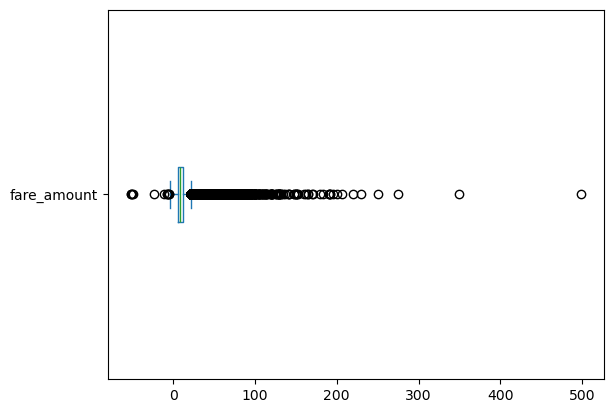

In [47]:
df['fare_amount'].plot.box(vert=False)

<Axes: >

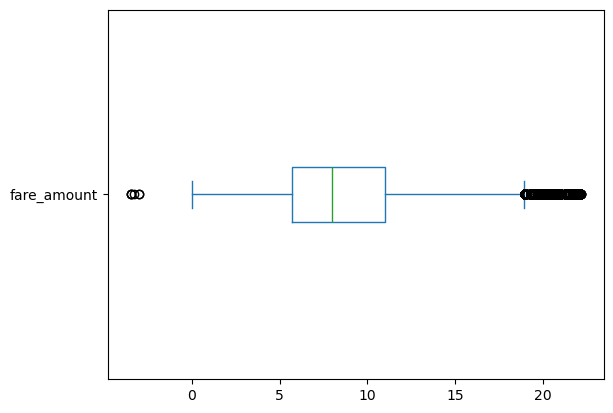

In [48]:
# calculate inter quartile range
q1=df['fare_amount'].quantile(0.25)
q3=df['fare_amount'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

#reomve outliers
df=df[(df['fare_amount']>=lower_bound) & (df['fare_amount']<=upper_bound)]

df['fare_amount'].plot.box(vert=False)

In [49]:
import matplotlib.pyplot as plt
import numpy as np

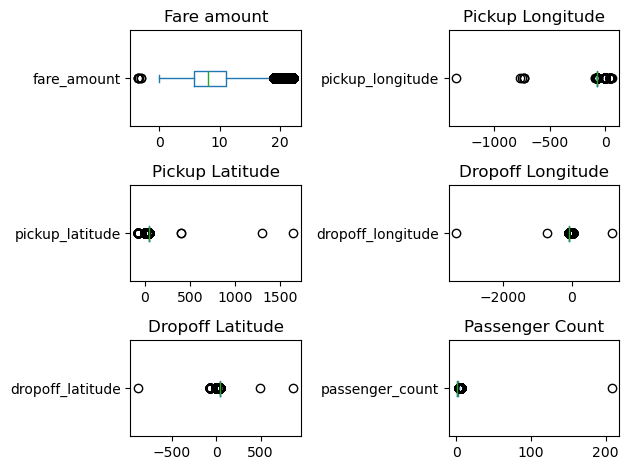

In [50]:
plt.subplot(3,2,1)
plt.title("Fare amount")
df['fare_amount'].plot.box(vert=False)

plt.subplot(3,2,2)
plt.title("Pickup Longitude")
df['pickup_longitude'].plot.box(vert=False)

plt.subplot(3,2,3)
plt.title("Pickup Latitude")
df['pickup_latitude'].plot.box(vert=False)

plt.subplot(3,2,4)
plt.title("Dropoff Longitude")
df['dropoff_longitude'].plot.box(vert=False)

plt.subplot(3,2,5)
plt.title("Dropoff Latitude")
df['dropoff_latitude'].plot.box(vert=False)

plt.subplot(3,2,6)
plt.title("Passenger Count")
df['passenger_count'].plot.box(vert=False)

plt.tight_layout()

## 3. Check the correlation

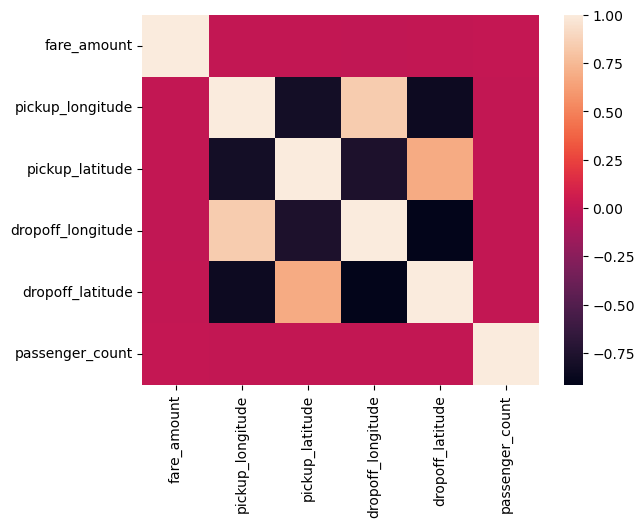

In [54]:
import seaborn as sns
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix)
plt.show()

## 4. Implement Linear Regression and Random Forest

In [56]:
#Split the data
X=df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
Y=df['fare_amount']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# here random_state works as a seed , everytime we run the code it divides the dataset from the same point

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [59]:
lr_m=LinearRegression()
lr_m.fit(X_train,Y_train)

LinearRegression()

In [60]:
rf_m=RandomForestRegressor(n_estimators=100,random_state=42)
#In the context of the RandomForestRegressor from the sklearn.ensemble module, the n_estimators parameter specifies the number of trees in the forest.
rf_m.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [62]:
# predict the values
y_lr_predict=lr_m.predict(X_test)
y_rf_predict=rf_m.predict(X_test)
print(y_lr_predict)
print(y_rf_predict)

[8.9092654  8.90920366 8.90920456 ... 9.12111117 8.90927677 8.90927104]
[ 5.141 17.307  7.891 ...  7.302  4.207 10.231]


## 5. Evaluate

In [64]:
# calculate R2 and RMSE
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [66]:
# for linear regression
r2_lr=r2_score(Y_test,y_lr_predict)
rmse_lr=np.sqrt(mean_squared_error(Y_test,y_lr_predict))

print("For Linear Regression")
print("R-square",r2_lr)
print("RMSE ",rmse_lr)

For Linear Regression
R-square 8.297133767465326e-05
RMSE  4.136624287486402


In [67]:
# for Random Forest Regression
r2_rf=r2_score(Y_test,y_rf_predict)
rmse_rf=np.sqrt(mean_squared_error(Y_test,y_rf_predict))

print("For Random Forest Regression")
print("R-square",r2_rf)
print("RMSE ",rmse_rf)

For Random Forest Regression
R-square 0.7052136223044838
RMSE  2.2460416246528774
